>>> PROJETO: FILTRO PASSA-BAIXAS CHEBYSHEV TIPO I DE 4ª ORDEM <<<
    - Frequência de Corte: 100 Hz
    - Ripple na Banda de Passagem: 1 dB

--- ETAPA 1: SÍNTESE MATEMÁTICA ---
Frequência de corte convertida para 628.32 rad/s.
Coeficientes a = [1.00000000e+00 9.52811379e+01 1.45392476e+04 7.42619373e+05
 2.75627582e+07] e b = [24565334.10450339].

Filtro decomposto em 2 seções de 2ª ordem (SOS).

Matriz SOS: [[4.07077712e-08 1.13603988e-06 4.01584147e-04 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 6.73739388e+01 2.79398094e+03 1.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

--- ETAPA 2: CÁLCULO DOS COMPONENTES DO CIRCUITO ---
--------------------------------------------------
RELATÓRIO DO ESTÁGIO SALLEN-KEY Nº 1
--------------------------------------------------
  Parâmetros da Seção:
    - Frequência Natural (f0): 0.00 Hz
    - Fator de Qualidade (Q): 0.0000

  Componentes Calculados:
    - Resistores (R1=R2): 0.00 kΩ
    - Capacitores (C1=C2): 10 nF (fixo)

  

C:\Users\thaua\AppData\Local\Temp\ipykernel_23896\2432709010.py:94: RuntimeWarning: divide by zero encountered in log10
  ganho_total_db = 20 * np.log10(ganho_total_abs)
C:\Users\thaua\AppData\Local\Temp\ipykernel_23896\2432709010.py:119: RuntimeWarning: divide by zero encountered in log10
  magnitude_db = 20 * np.log10(magnitude_ajustada)


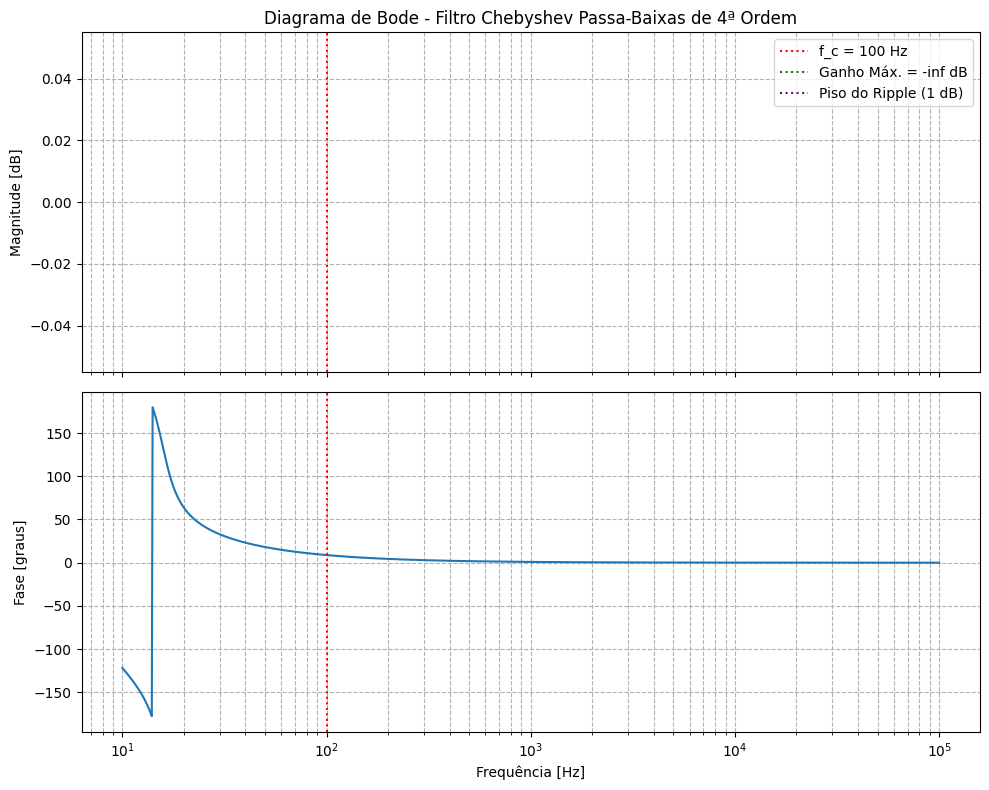

Gráfico gerado. Compare este resultado com a simulação no LTspice.


: 

In [ ]:
# =============================================================================
# PROJETO DE FILTRO ATIVO SALLEN-KEY (PASSA-BAIXAS) - CHEBYSHEV TIPO I
# SCRIPT PARA SER PREENCHIDO PELO ALUNO
# =============================================================================

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# =============================================================================
# PARÂMETROS DO PROJETO
# =============================================================================
ORDEM_FILTRO = 4
FREQ_CORTE_HZ = 100
RIPPLE_PASSBAND_DB = 1
C_FIXO = 10e-9  # Capacitor fixo de 10 nF
RA_FIXO = 10e3  # Resistor de ganho RA fixo de 10 kOhm

print(">>> PROJETO: FILTRO PASSA-BAIXAS CHEBYSHEV TIPO I DE 4ª ORDEM <<<")
print(f"    - Frequência de Corte: {FREQ_CORTE_HZ} Hz")
print(f"    - Ripple na Banda de Passagem: {RIPPLE_PASSBAND_DB} dB\n")


# =============================================================================
# ETAPA 1: SÍNTESE MATEMÁTICA DO FILTRO
# =============================================================================
print("--- ETAPA 1: SÍNTESE MATEMÁTICA ---")

# 1.1 - Frequência de Corte Angular (rad/s)
# Use np.pi para o valor de pi
w_corte_rad_s = 2*np.pi*FREQ_CORTE_HZ # COMPLETE AQUI - feito
print(f"Frequência de corte convertida para {w_corte_rad_s:.2f} rad/s.")

# 1.2 - Geração dos Coeficientes da Função de Transferência

b, a = signal.cheby1 (ORDEM_FILTRO, RIPPLE_PASSBAND_DB, FREQ_CORTE_HZ, btype = 'low', analog=True ) # COMPLETE AQUI - usar signal.cheby1 -  cheby1(N, rp, Wn[, btype, analog, output, fs])
print(f"Coeficientes a = {a} e b = {b}.\n")

# 1.3 - Conversão para Seções de Segunda Ordem (SOS)
# Use a função signal.tf2sos(b, a)
sos = signal.tf2sos(a,b) # COMPLETE AQUI - feito
print(f"Filtro decomposto em {len(sos)} seções de 2ª ordem (SOS).\n")
print(f"Matriz SOS: {sos} \n")

# =============================================================================
# ETAPA 2: DESENVOLVIMENTO DO CIRCUITO (SALLEN-KEY)
# =============================================================================
print("--- ETAPA 2: CÁLCULO DOS COMPONENTES DO CIRCUITO ---")

ganhos_k = []  # Lista para armazenar o ganho de cada estágio

# 2.1 - O laço 'for' itera sobre cada linha da matriz SOS
for i, secao in enumerate(sos):
    num_estagio = i + 1

    # Extrai os coeficientes a0, a1, a2 do denominador da seção atual
    # O formato da seção é [b0, b1, b2, a0, a1, a2]
    a0, a1, a2 = secao[3], secao[4], secao[5]

    # 2.2 - Calcula a frequência natural (w0) e o fator de qualidade (Q)
    # w0 = sqrt(numero)
    w0_sos = 0 # COMPLETE AQUI

    Q_sos = 0 # COMPLETE AQUI

    # 2.3 - Cálculo dos Componentes para a topologia de componentes iguais

    K = 0 # COMPLETE AQUI

    R = 0 # COMPLETE AQUI

    RB = 0 # COMPLETE AQUI

    ganhos_k.append(K)

    # Imprime o relatório de componentes para o estágio atual
    print("-" * 50)
    print(f"RELATÓRIO DO ESTÁGIO SALLEN-KEY Nº {num_estagio}")
    print("-" * 50)
    print(f"  Parâmetros da Seção:")
    print(f"    - Frequência Natural (f0): {w0_sos / (2 * np.pi):.2f} Hz")
    print(f"    - Fator de Qualidade (Q): {Q_sos:.4f}")
    print(f"\n  Componentes Calculados:")
    print(f"    - Resistores (R1=R2): {R / 1e3:.2f} kΩ")
    print(f"    - Capacitores (C1=C2): {C_FIXO * 1e9:.0f} nF (fixo)")
    print(f"\n  Malha de Ganho:")
    print(f"    - Ganho K necessário: {K:.4f}")
    print(f"    - Resistor RA: {RA_FIXO / 1e3:.0f} kΩ (fixo)")
    print(f"    - Resistor RB: {RB / 1e3:.2f} kΩ\n")

# 2.4 - Cálculo do Ganho Total
# O ganho total absoluto é o produto dos ganhos de cada estágio
ganho_total_abs = 0 # COMPLETE AQUI
ganho_total_db = 20 * np.log10(ganho_total_abs)
print("=" * 50)
print("GANHO TOTAL DO FILTRO EM CASCATA")
print(f"  - Ganho Absoluto (K1 * K2): {ganho_total_abs:.4f}")
print(f"  - Ganho em dB: {ganho_total_db:.2f} dB")
print("=" * 50 + "\n")



# =============================================================================
# ETAPA 3: VALIDAÇÃO GRÁFICA TEÓRICA
# =============================================================================
print("--- ETAPA 3: GERANDO DIAGRAMA DE BODE TEÓRICO ---")

# 3.1 - Geração da Resposta em Frequência
# Cria um vetor de frequências de 10 Hz a 100 kHz para o plot
frequencias_hz = np.logspace(1, 5, 1000)
w_freqs = 2 * np.pi * frequencias_hz

# Calcula a resposta em frequência (complexa) do filtro original
w_resp, h_resp = signal.freqs(b, a, worN=w_freqs)

# 3.2 - Ajuste de Ganho e Conversão para dB
# A resposta de signal.freqs é normalizada. Ajustamos pelo ganho do nosso circuito.
magnitude_ajustada = np.abs(h_resp) * ganho_total_abs
magnitude_db = 20 * np.log10(magnitude_ajustada)
fase_graus = np.angle(h_resp, deg=True)

# 3.3 - Plotagem e Análise do Gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot da Magnitude
ax1.semilogx(frequencias_hz, magnitude_db)
ax1.set_title(f'Diagrama de Bode - Filtro Chebyshev Passa-Baixas de {ORDEM_FILTRO}ª Ordem')
ax1.set_ylabel('Magnitude [dB]')
ax1.grid(which='both', linestyle='--')
ax1.axvline(x=FREQ_CORTE_HZ, color='r', linestyle=':', label=f'f_c = {FREQ_CORTE_HZ} Hz')
ax1.axhline(y=ganho_total_db, color='g', linestyle=':', label=f'Ganho Máx. = {ganho_total_db:.2f} dB')
ax1.axhline(y=ganho_total_db - RIPPLE_PASSBAND_DB, color='purple', linestyle=':', label=f'Piso do Ripple ({RIPPLE_PASSBAND_DB} dB)')
ax1.legend()

# Plot da Fase
ax2.semilogx(frequencias_hz, fase_graus)
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Fase [graus]')
ax2.grid(which='both', linestyle='--')
ax2.axvline(x=FREQ_CORTE_HZ, color='r', linestyle=':')

plt.tight_layout()
plt.show()

print("Gráfico gerado. Compare este resultado com a simulação no LTspice.")


